This notebook explores creating Bayer grid data from RGB images.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import time

In [4]:
%load_ext autoreload
%autoreload 1
%aimport getBayer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


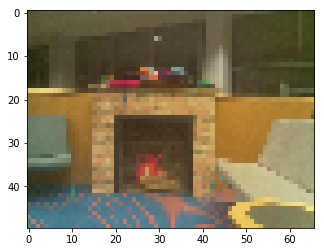

In [5]:
rgb = getBayer.get_rgb_array("pic2.jpeg", height=50)
plt.imshow(rgb)

In [6]:
rgb.shape

(50, 66, 3)

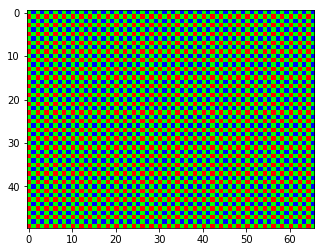

In [7]:
mock_grid = getBayer.get_bayer_grid(height=50, width=66)
plt.imshow(mock_grid.astype(np.float))

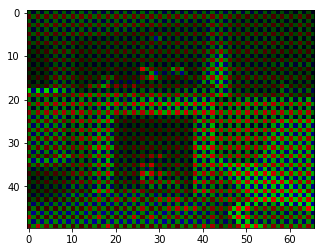

In [8]:
bayerized_rgb = rgb * mock_grid
plt.imshow(bayerized_rgb)

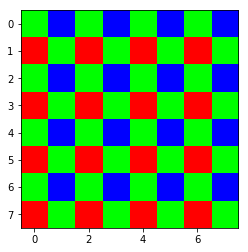

In [9]:
small_bayer = getBayer.get_bayer_grid(8,8)
plt.imshow(small_bayer.astype(np.float))

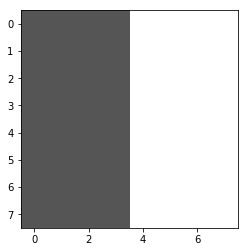

In [49]:
edge_example = np.ones((8,8,3), dtype=np.float)
edge_example[:,:4] = 1/3
plt.imshow(edge_example)

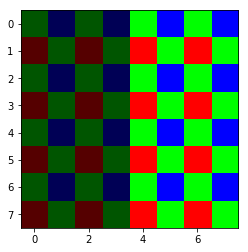

In [50]:
edge_bayerized = edge_example * small_bayer
plt.imshow(edge_bayerized)

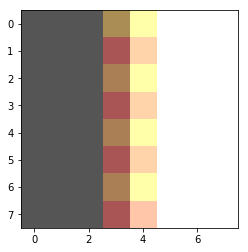

In [51]:
edge_debayerized = getBayer.debayerize(edge_bayerized, small_bayer.astype(np.float))
plt.imshow(edge_debayerized)

In [52]:
edge_debayerized[:2,:,:]  # inspect top 2 rows of pixels

array([[[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.55555556, 0.33333333],
        [1.        , 1.        , 0.66666667],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.33333333, 0.33333333],
        [1.        , 0.83333333, 0.66666667],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]]])

In [53]:
edge_bayerized[:2,:,:]

array([[[0.        , 0.33333333, 0.        ],
        [0.        , 0.        , 0.33333333],
        [0.        , 0.33333333, 0.        ],
        [0.        , 0.        , 0.33333333],
        [0.        , 1.        , 0.        ],
        [0.        , 0.        , 1.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.        , 1.        ]],

       [[0.33333333, 0.        , 0.        ],
        [0.        , 0.33333333, 0.        ],
        [0.33333333, 0.        , 0.        ],
        [0.        , 0.33333333, 0.        ],
        [1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ]]])

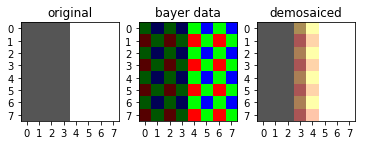

In [54]:
fig = plt.figure()
# plt.subplot(1, 3, 1)
for i, (plot, title) in enumerate([(edge_example, 'original'), (edge_bayerized, 'bayer data'), (edge_debayerized, 'demosaiced')]):
    plt.subplot(1, 3, i+1)
    plt.imshow(plot)
    plt.title(title)
    plt.xticks(range(8))
    plt.yticks(range(8))

In [57]:
fig.savefig('figures/edge_zippering.pdf')

/home/newsch/miniconda3/envs/wonky-bobbin/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:328: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  Op = Bunch(**{name: Operator(value) for name, value in six.iteritems(_pdfops)})
